<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 10 - Unsupervised Learning</center></b></h2>
    <h4><i><b><center>Iris Flower Dataset</center></b></i></h4></td></tr>
</table>

## Unsupervised Learning

Unsupervised Learning is a subset of ML techniques to group unlabeled data according to its characteristics, in a process known as __clustering__.

There are many types of clustering algorithms:

* __Partitioning Clustering__

* __Density-based Clustering__

* __Hierarchical Clustering__

<div>
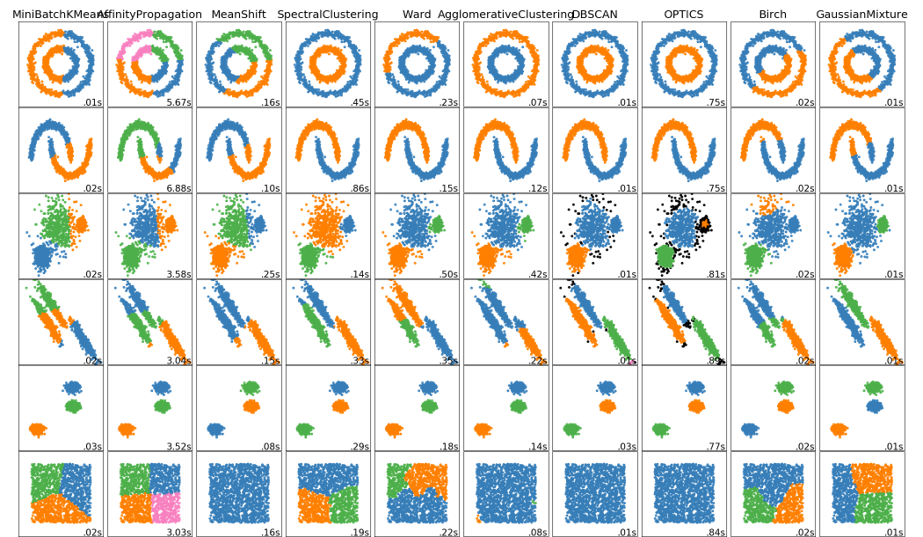
</div>
Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### K-Means

K-Means is one of the most common clustering methods, where data samples are split into K clusters. In an iterative process, cluster centroids are adjusted until a convergence is reached, where all samples are assigned to the closest centroid.

1. K points are set as initial centroids, among the unlabelled data.

2. Every object is assigned to its closest centroid.

3. Computation the new centroid for each cluster.

4. Repetition of steps 2 and 3 until all cluster memberships stabilise.

<div>
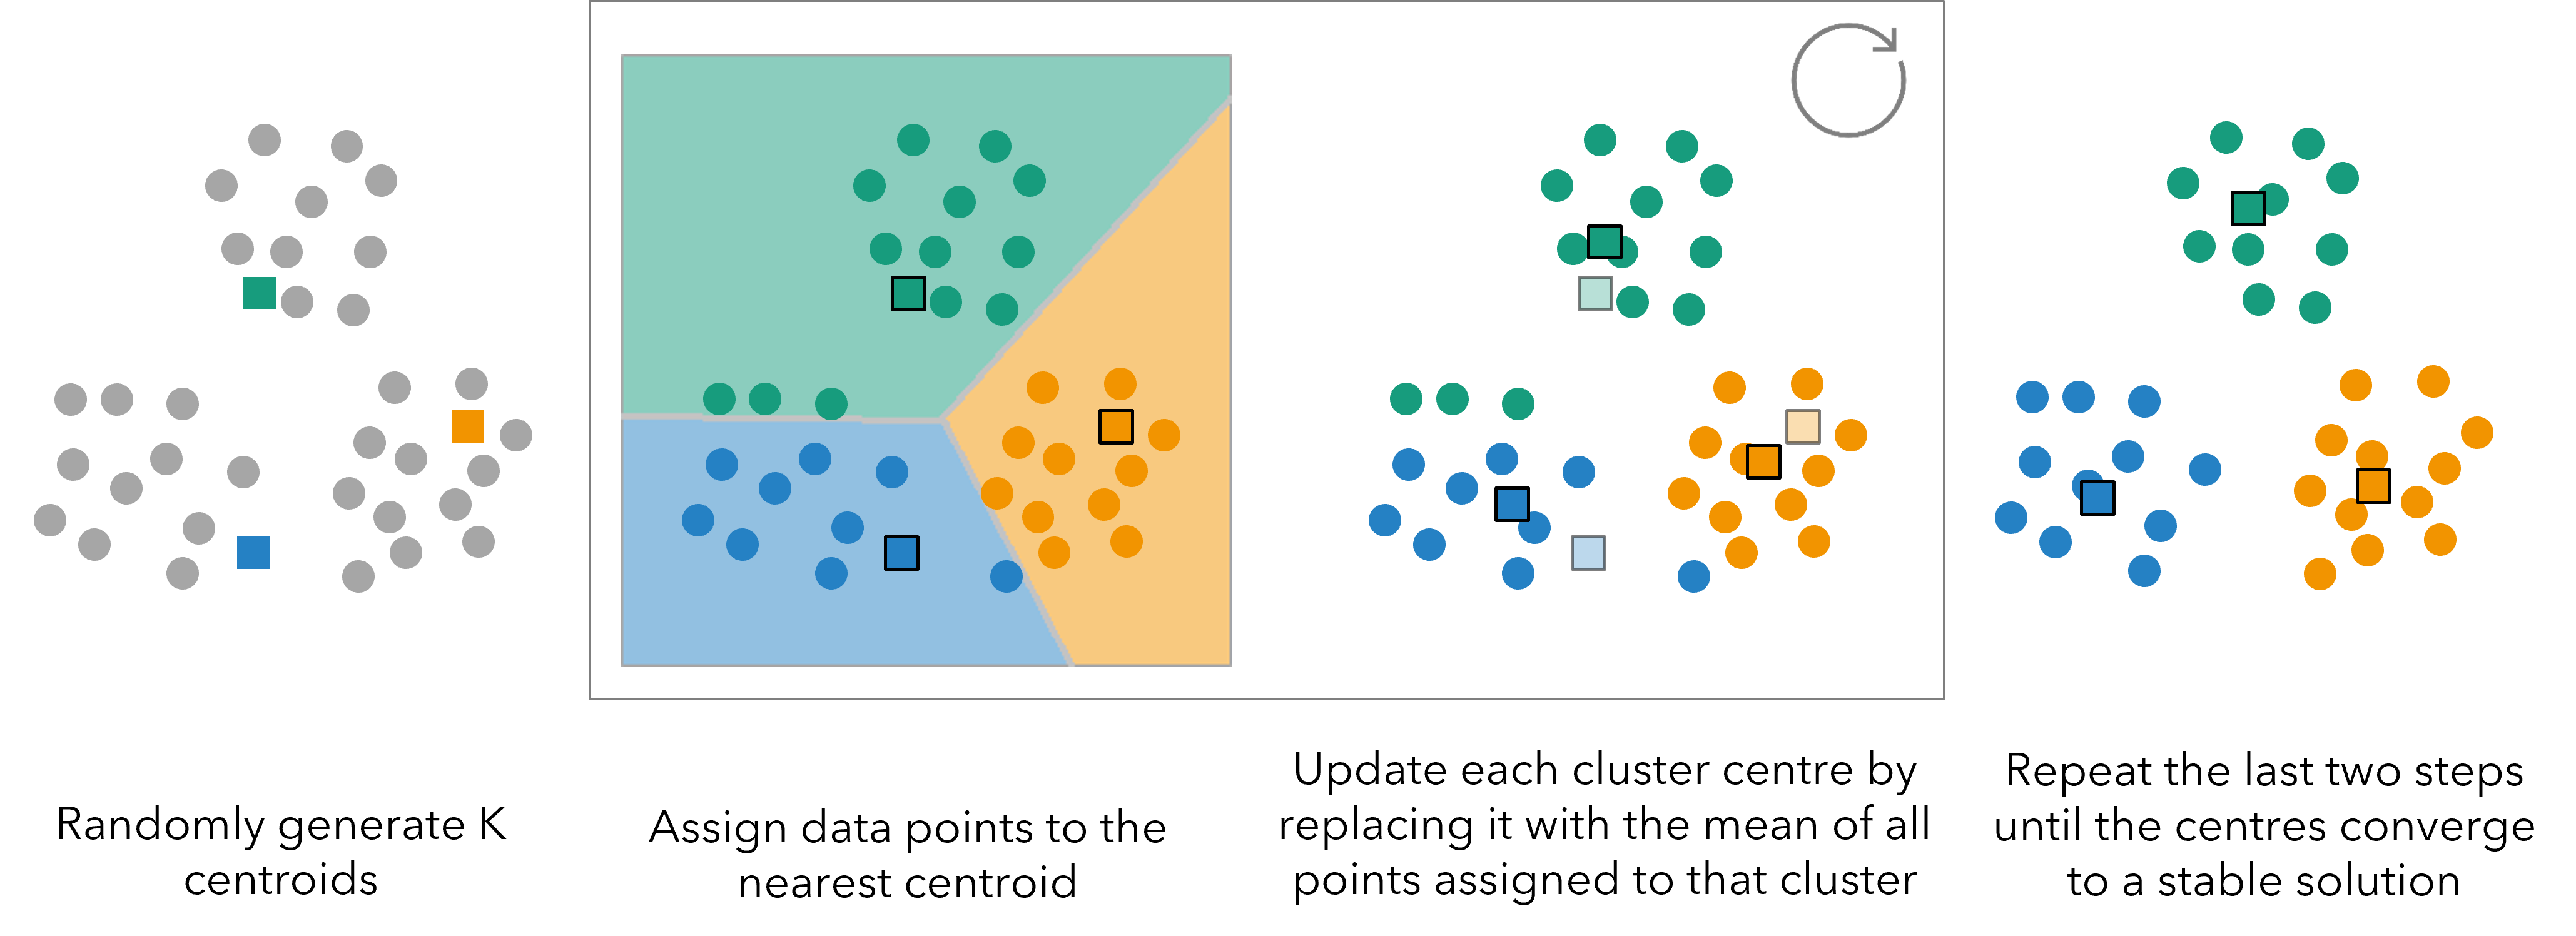
</div>

We will implement the K-Means algorithm from scratch.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Generating Data and visualization

Let's generate a dataset using the [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method from sklearn, `15` samples, `2` features and `3` centers (clusters).

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 15
n_features = 2
n_centers = 3

# Generate data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=1)

Also, we will define a function to plot clusters in an intuitive way, so we can verify the results of the iterative process.

In [ ]:
def plot_clusters(X, y, centroids=None):
    plt.figure(figsize=(5,4))
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200)
    for yi in set(y):
        idx = y == yi
        plt.scatter(X[idx, 0], X[idx, 1], color='C' + str(yi))

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.show()
    
plot_clusters(X, y)

##### Computing Distance between Samples and Clusters

As all samples are assigned to the closest centroid, we need to define a method to compute distances.

Let's define an initial starting point using the first 3 samples as clusters.

In [ ]:
centroids = X[:n_centers,:]

__Exercise 1__: Create a function to compute the distance matrix, `D`, to each centroid ,`[# samples, # centroids]`, using the euclidean distance `scipy.spatial.distance.euclidean`

In [ ]:
from scipy.spatial.distance import euclidean

def distance_matrix(centroids, X):
    
    # TODO
    
    return 

In [ ]:
D = distance_matrix(centroids, X)

D

Considering the initial centroids and the respective distance matrix, we can verify the initial results.

__Exercise 2__: Using the previous distance matrix, find the nearest centroid for each sample and plot the result using `plot_clusters` function.

##### Computing Centroids

After assigning each sample to the closest centroid, new centroids must be computed.

__Exercise 3__: Define a function to compute the new centroids.

In [ ]:
def compute_centroids(X, y):
    
    # TODO
    
    return centroid

__Exercise 4__: With all steps of the process defined, we can implement the K-Means iterative process. Define a function for k-means computation and plot the clusters in each iteration.

In [ ]:
def k_means(X, n_clusters):
    
    # Initialization
    # 1. Initial clusters
    centroids = X[:n_clusters,:]
    
    # 2. Distance matrix
    D = 

    # 3. Reassign clusters
    y_est =  
    
    # 4. Array to save the previous values. In the first iteration assign -1 to all data points
    y_old = np.ones_like(y_est) * -1
    
    # 5. Loop until two consecutive iterations produce the same clusters
    while not np.all(y_est == y_old):
        
        # compute centroids
        
        # compute distance matrix to new centroids
        
        # update y_old
        
        # update y_est - reassign clusters
        
        # plot clusters


In [ ]:
k_means(X, 3)

### K-Means with Sklearn

Sklearn library contains an implementation of the [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans) algorithm. 

__Exercise 5__: Use `KMeans` algorithm to fit the generated data and check the results.



In [ ]:
from sklearn.cluster import KMeans

# create a KMeans instance

# model fit

# predict the cluster labels


In [ ]:
# centroids
centroids = 
print(centroids)

# scatter plot
plot_clusters( ... )

## Iris Dataset

Lets apply `KMeans`on iris dataset


Loading the Iris Flower Dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

Let's visualize the data using the seaborn visualization library.

In [ ]:
# load dataset from seaborn
df = sns.load_dataset('iris')

# seaborn pairplot
sns.pairplot(df, hue='species');

To use `Kmeans` for our unsupervised task, we need to previously identify the right number of clusters. For this we can implement the __elbow method__ using the results of `Kmeans` inertia graph.

The __elbow method__ is a technique to determine the optimal number of clusters. It works by plotting the within-cluster sum of squares (WCSS) for different cluster numbers and identifying the “elbow” point where WCSS starts to level off.


__Exercise 6__: Implement the elbow method running the `KMeans` with a range of `6` clusters.

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the iris data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [ ]:
n_clusters = range(1, 6)
inertias = []

# loop with a range of 6 clusters
for k in n_clusters:
    
    # Create a KMeans instance with k clusters: model
    
    # Fit model
    
    # Append the inertia to the list of inertias
    

__Exercise 7__: Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [ ]:
# Plot n_clusters (x-axis) vs inertias (y-axis) and define the axis labels




We can see from the graph that 3 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

__Exercice 8__: Train a KMeans algorithm on the iris Dataset using 3 clusters. Use the provided method to visualize the results the results. What conclusions do you take?

_Note_: To use the predicted labels one can use K-means' attribute `model.labels_`

__Exercise 9:__ Compare the real labels of iris dataset with labels of `KMeans`. Are the results similar?

In [ ]:
def visualize_k_means(X, y, feature_names, kmeans_labels):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    axes[0].scatter(X[:, 0], X[:, 1], c=y)
    axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels)
    axes[0].set_ylabel(feature_names[1])
    axes[0].set_xlabel(feature_names[0])
    axes[1].set_xlabel(feature_names[0])

    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    axes[0].scatter(X[:, 2], X[:, 3], c=y)
    axes[1].scatter(X[:, 2], X[:, 3], c=kmeans_labels)
    axes[0].set_ylabel(feature_names[3])
    axes[0].set_xlabel(feature_names[2])
    axes[1].set_xlabel(feature_names[2])

    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)
    
    plt.show()

In [ ]:
visualize_k_means(X, y, feature_names, kmeans_labels)

__Exercice 10__: The [`adjusted_rand_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) metric from sklearn allows to evaluate the closeness to reality of a clustering result. Apply this metric to the results.